This is a second notebook that explores with cleaning our data from other notebook differently. Algorithms from this notebook are tested out in testing algorithms 2

# Cleaning Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv('./diamonds-datamad0321/train.csv')

In [3]:
diamonds.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
diamonds.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

Most of our data is numeric except color,  clarity, and cut. 

In [5]:
diamonds.color.value_counts()

G    8462
E    7308
F    7213
H    6201
D    5010
I    4134
J    2127
Name: color, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

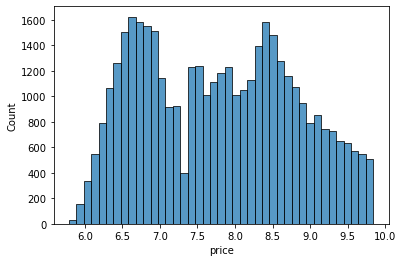

In [6]:
sns.histplot(diamonds.price)

<AxesSubplot:>

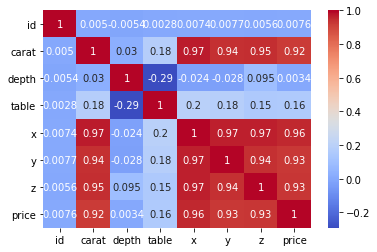

In [7]:
sns.heatmap(diamonds.corr(), annot = True , cmap = 'coolwarm')

<AxesSubplot:>

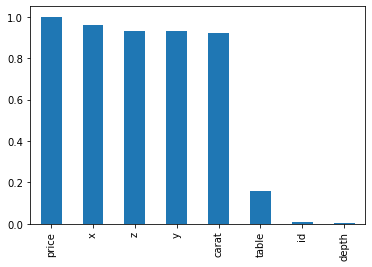

In [8]:
corr_price = diamonds.corr()['price']
corr_price.sort_values(ascending = False).plot(kind = 'bar')

As we can see, the variables the depth variable has verry little correlation with the price, we will keep this in mind when creating our model. Color seems to have a negative correlation with price of -16% and table has a positive correlation of 16%

In [9]:
#We select all the categorical columns in our dataframe
categorical = diamonds.select_dtypes(include = ['object']).columns.tolist()
categorical

['cut', 'color', 'clarity']

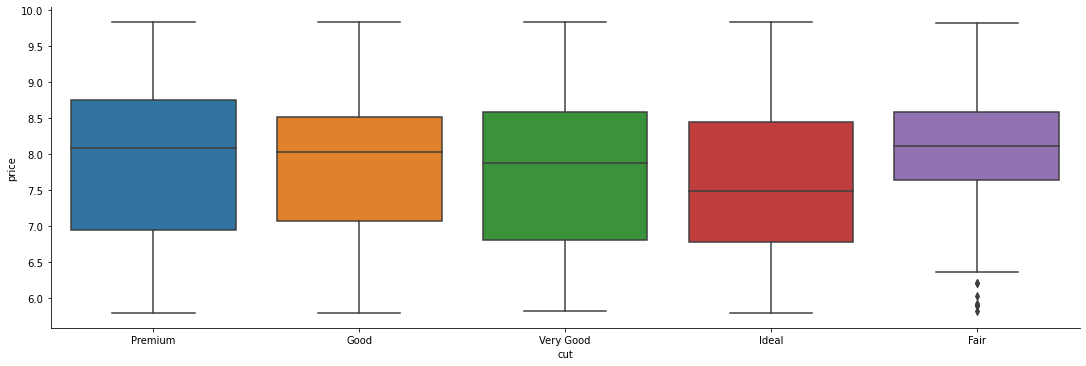

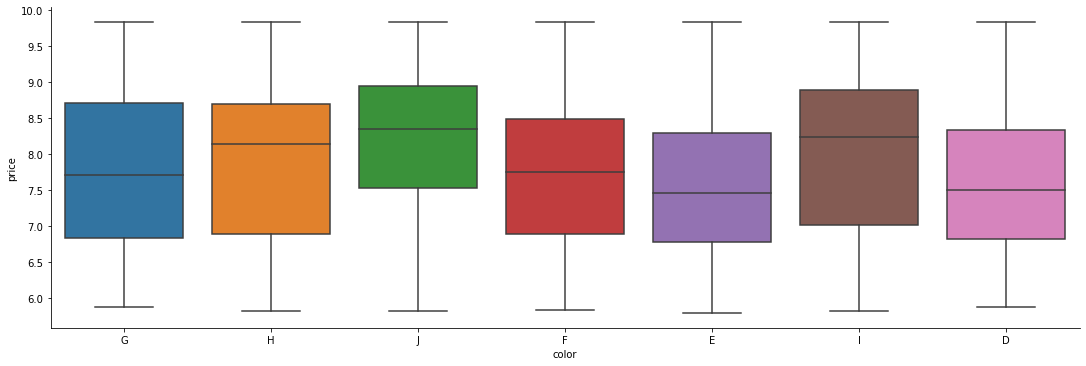

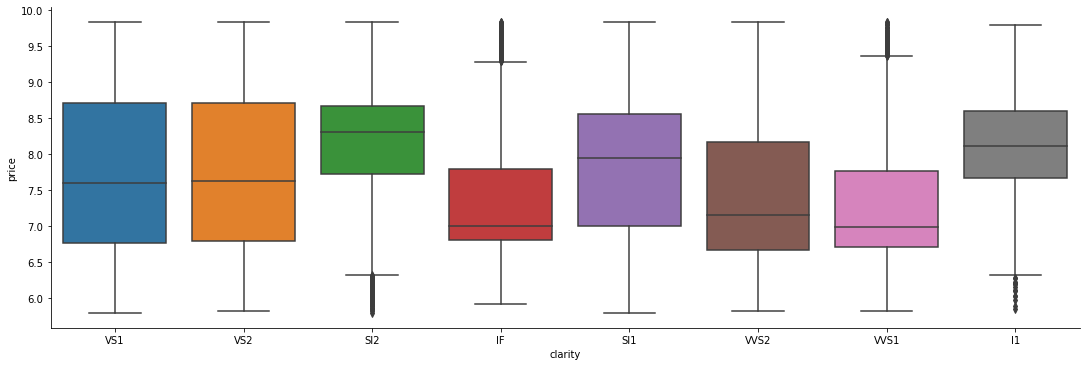

In [11]:
#We create a box plot
for col in categorical:
    sns.catplot(x=col, y="price", kind = 'box', dodge = False, height = 5, aspect = 3,data=diamonds)

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


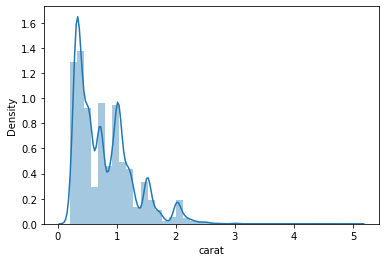

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


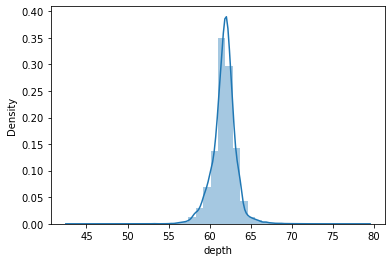

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


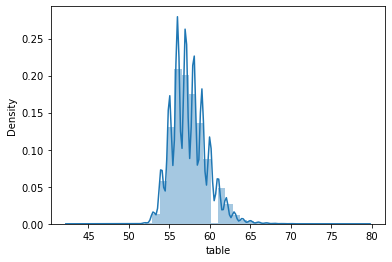

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


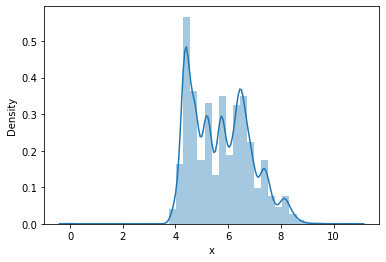

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


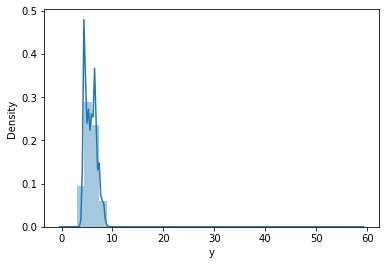

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


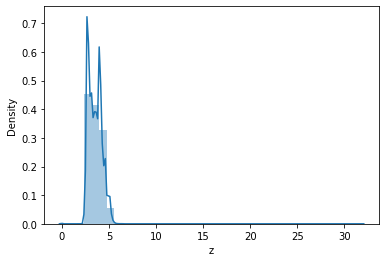

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


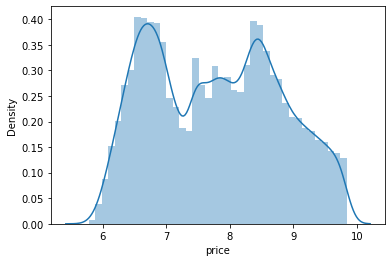

In [12]:
numerical = diamonds.select_dtypes(include = ['int64', 'float64']).columns.tolist()

for col in numerical[1:9]:
    sns.distplot(diamonds[col], kde=True, bins=40)
    plt.show()


### As we can see most of our values are not Gausianly distributed, therefore standardization won't help us deal with different ranges in our data (except for the depth column)

# How colors affect diamond grade:

In the diamond world near colorlessness means a more valuable diamond. Here is how the scale works (7 being the most colorless)
1. J
2. I
3. H
4. G
5. F
6. E
7. D

We are going to change this column of categorical variables into ordinal ones, that represent the order of value in the diamonds color.

In [14]:
diamonds_color = onehotencoder.fit_transform(diamonds['color'].values.reshape(-1,1)).toarray()

In [15]:
labels = [str(a) for a in list(diamonds.color.unique())]

In [16]:
diamonds[labels] = pd.DataFrame(diamonds_color,index = diamonds.index)

In [17]:
diamonds

,id,carat,cut,color,clarity,depth,table,x,y,z,price,G,H,J,F,E,I,D
0,0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,8.754,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,7.492,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,9.010,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,6.227,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,8.314,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,Ideal,E,VS2,62.5,55.0,5.08,5.13,3.19,7.412,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40451,40451,0.80,Ideal,H,VS2,62.1,54.0,5.96,5.99,3.71,8.016,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40452,40452,1.53,Premium,G,SI2,58.7,59.0,7.51,7.45,4.39,9.070,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40453,40453,1.51,Ideal,I,VS2,61.6,54.0,7.38,7.42,4.57,9.199,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

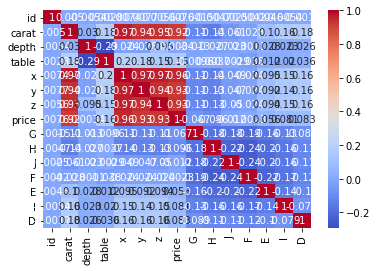

In [21]:
sns.heatmap(diamonds.corr(), annot = True , cmap = 'coolwarm')

<AxesSubplot:>

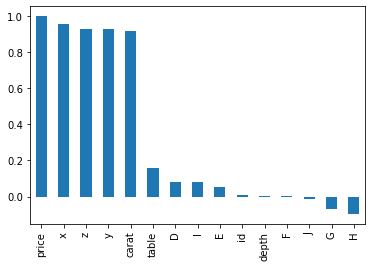

In [22]:
corr_price = diamonds.corr()['price']
corr_price.sort_values(ascending = False).plot(kind = 'bar')

# How cut affects diamond quality:

cut is an important factor when looking at diamond quality. We don't know if this variable has any type of order so we will use one-hot encoding to assign a variable to each with a value from 1 to 0

1. Fair, 
2. Good, 
3. Very Good, 
4. Premium, 
5. Ideal

In [23]:
diamonds.cut.unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [24]:
diamonds_cut = onehotencoder.fit_transform(diamonds['cut'].values.reshape(-1,1)).toarray()

labels = [str(a) for a in list(diamonds.cut.unique())]

diamonds[labels] = pd.DataFrame(diamonds_cut,index = diamonds.index)

diamonds

,id,carat,cut,color,clarity,depth,table,x,y,z,...,J,F,E,I,D,Premium,Good,Very Good,Ideal,Fair
0,0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,Ideal,E,VS2,62.5,55.0,5.08,5.13,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40451,40451,0.80,Ideal,H,VS2,62.1,54.0,5.96,5.99,3.71,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40452,40452,1.53,Premium,G,SI2,58.7,59.0,7.51,7.45,4.39,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40453,40453,1.51,Ideal,I,VS2,61.6,54.0,7.38,7.42,4.57,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


<AxesSubplot:>

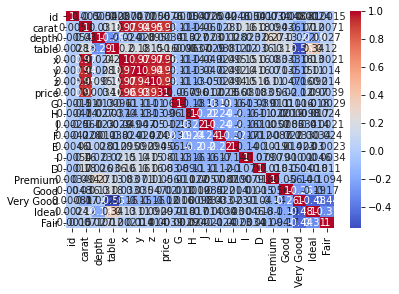

In [25]:
sns.heatmap(diamonds.corr(), annot = True , cmap = 'coolwarm')

<AxesSubplot:>

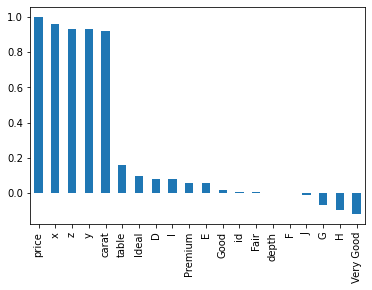

In [26]:
corr_price = diamonds.corr()['price']
corr_price.sort_values(ascending = False).plot(kind = 'bar')

as we can see, cut has a low correlation to 

# Transforming the clarity column

In [27]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [28]:
diamonds_clarity = onehotencoder.fit_transform(diamonds['clarity'].values.reshape(-1,1)).toarray()

In [29]:
labels = [str(a) for a in list(diamonds.clarity.unique())]

In [30]:
diamonds[labels] = pd.DataFrame(diamonds_clarity,index = diamonds.index)

In [31]:
diamonds

,id,carat,cut,color,clarity,depth,table,x,y,z,...,Ideal,Fair,VS1,VS2,SI2,IF,SI1,VVS2,VVS1,I1
0,0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,Ideal,E,VS2,62.5,55.0,5.08,5.13,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40451,40451,0.80,Ideal,H,VS2,62.1,54.0,5.96,5.99,3.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40452,40452,1.53,Premium,G,SI2,58.7,59.0,7.51,7.45,4.39,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40453,40453,1.51,Ideal,I,VS2,61.6,54.0,7.38,7.42,4.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
diamonds = diamonds.drop(['clarity', 'color', 'cut'], axis = 1)

In [33]:
#Now we have only numerical values
diamonds

,id,carat,depth,table,x,y,z,price,G,H,...,Ideal,Fair,VS1,VS2,SI2,IF,SI1,VVS2,VVS1,I1
0,0,1.01,62.7,58.0,6.36,6.31,3.97,8.754,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.60,64.3,57.0,5.31,5.38,3.43,7.492,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.60,59.4,59.0,7.55,7.60,4.50,9.010,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.30,63.5,58.0,4.27,4.24,2.70,6.227,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,1.00,62.8,57.0,6.37,6.44,4.02,8.314,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,62.5,55.0,5.08,5.13,3.19,7.412,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40451,40451,0.80,62.1,54.0,5.96,5.99,3.71,8.016,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40452,40452,1.53,58.7,59.0,7.51,7.45,4.39,9.070,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40453,40453,1.51,61.6,54.0,7.38,7.42,4.57,9.199,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Standarizing the Depth Column

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
diamonds['depth'] = scaler.fit_transform(diamonds["depth"].values.reshape(-1,1))

In [37]:
diamonds.depth

0        0.663492
1        1.776841
2       -1.632789
3        1.220167
4        0.733077
           ...   
40450    0.524324
40451    0.245987
40452   -2.119879
40453   -0.101935
40454    0.245987
Name: depth, Length: 40455, dtype: float64

# Standarizing the Table Column

In [38]:
scaler = StandardScaler()

In [39]:
diamonds['table'] = scaler.fit_transform(diamonds["table"].values.reshape(-1,1))

In [40]:
diamonds.table

0        0.244212
1       -0.204490
2        0.692914
3        0.244212
4       -0.204490
           ...   
40450   -1.101894
40451   -1.550596
40452    0.692914
40453   -1.550596
40454   -0.204490
Name: table, Length: 40455, dtype: float64

# Train, Test, Split

In [41]:
diamonds.dtypes

id             int64
carat        float64
depth        float64
table        float64
x            float64
y            float64
z            float64
price        float64
G            float64
H            float64
J            float64
F            float64
E            float64
I            float64
D            float64
Premium      float64
Good         float64
Very Good    float64
Ideal        float64
Fair         float64
VS1          float64
VS2          float64
SI2          float64
IF           float64
SI1          float64
VVS2         float64
VVS1         float64
I1           float64
dtype: object

In [42]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [43]:
X = diamonds.drop(['price', 'id'], axis = 1)
X

,carat,depth,table,x,y,z,G,H,J,F,...,Ideal,Fair,VS1,VS2,SI2,IF,SI1,VVS2,VVS1,I1
0,1.01,0.663492,0.244212,6.36,6.31,3.97,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.60,1.776841,-0.204490,5.31,5.38,3.43,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.60,-1.632789,0.692914,7.55,7.60,4.50,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.30,1.220167,0.244212,4.27,4.24,2.70,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.00,0.733077,-0.204490,6.37,6.44,4.02,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,0.51,0.524324,-1.101894,5.08,5.13,3.19,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40451,0.80,0.245987,-1.550596,5.96,5.99,3.71,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40452,1.53,-2.119879,0.692914,7.51,7.45,4.39,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40453,1.51,-0.101935,-1.550596,7.38,7.42,4.57,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
y = diamonds['price']


In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19)

# Testing Algorithms

### Random Forest Regressor 1

In [146]:
X_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'G', 'H', 'J', 'F', 'E', 'I',
       'D', 'Premium', 'Good', 'Very Good', 'Ideal', 'Fair', 'VS1', 'VS2',
       'SI2', 'IF', 'SI1', 'VVS2', 'VVS1', 'I1'],
      dtype='object')

In [128]:
y_train.shape

(35195,)

In [127]:
y_test.shape

(5260,)

In [272]:
RFG = RandomForestRegressor(n_estimators=110, max_depth=20, max_features=22, min_samples_split = 4)

In [273]:
RFG = RFG.fit(X_train, y_train)

In [274]:
from sklearn.metrics import r2_score

In [275]:
rf_mse_score = mean_squared_error(
    y_pred=RFG.predict(X_test),
    y_true=y_test,
)

In [276]:
rf_mse_score

0.0085437120886029

In [277]:
pickle.dump(RFG, open("rf3", 'wb'))

# Adjusting Parameters in our Random Forest

In [177]:
from sklearn.model_selection import GridSearchCV

In [166]:
X_train.shape

(32364, 26)

In [167]:
gs = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        "max_depth": [10, 11, 12, 13],
        "min_samples_split": [20, 30, 50, 100],
        "max_features": [9, 11, 14, 15]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [168]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] max_depth=10, max_features=9, min_samples_split=20 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=9, min_samples_split=20, score=(train=-0.016, test=-0.019), total=   2.6s
[CV] max_depth=10, max_features=9, min_samples_split=20 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  max_depth=10, max_features=9, min_samples_split=20, score=(train=-0.016, test=-0.018), total=   2.3s
[CV] max_depth=10, max_features=9, min_samples_split=20 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


[CV]  max_depth=10, max_features=9, min_samples_split=20, score=(train=-0.016, test=-0.018), total=   2.3s
[CV] max_depth=10, max_features=9, min_samples_split=20 ..............
[CV]  max_depth=10, max_features=9, min_samples_split=20, score=(train=-0.016, test=-0.020), total=   2.3s
[CV] max_depth=10, max_features=9, min_samples_split=20 ..............


KeyboardInterrupt: 

In [190]:
best_tree = gs.best_estimator_
best_tree

RandomForestRegressor(max_depth=13, max_features=14, min_samples_split=20)

### Gradient Boost

In [281]:
GB = GradientBoostingRegressor(max_depth = 11, min_samples_split = 4, max_features = 20, n_estimators = 100)

In [284]:
GB_model = GB.fit(X_train, y_train)

In [283]:
gb_mse_score = mean_squared_error(
    y_pred=GB.predict(X_test),
    y_true=y_test,
)
gb_mse_score

0.007763215956561162

In [285]:
pickle.dump(GB_model, open("GB_model", 'wb'))

### GB Parameters

In [206]:
gb_gs = GridSearchCV(
    estimator= GradientBoostingRegressor(),
    param_grid={
        "max_depth": [11, 14],
        "min_samples_split": [4, 6],
        "max_features": [11, 14, 15, 16],
        'n_estimators' : [200, 250, 300]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)


In [207]:
gb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] max_depth=11, max_features=11, min_samples_split=15, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=11, max_features=11, min_samples_split=15, n_estimators=200, score=(train=-0.002, test=-0.008), total=   9.5s
[CV] max_depth=11, max_features=11, min_samples_split=15, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s


KeyboardInterrupt: 

In [141]:
best_tree_gb_gs = gb_gs.best_estimator_
best_tree_gb_gs

NameError: name 'gb_gs' is not defined

In [202]:
gb_mse_score = mean_squared_error(
    y_pred=best_tree_gb_gs.predict(X_test),
    y_true=y_test,
)
gb_mse_score

NameError: name 'best_tree_gb_gs' is not defined

# XGBOOST

In [200]:
!pip install xgboost

     |████████████████████████████████| 1.2 MB 4.1 MB/s eta 0:00:01
You should consider upgrading via the '/Users/javiercabrera/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [108]:
import xgboost as xgb

In [109]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [110]:
param = {
    'eta': 0.3, 
    'max_depth': 25  
    'objective': 'multi:softprob',  
    'num_class': 3} 
steps = 20

SyntaxError: invalid syntax (<ipython-input-110-8532e81316cb>, line 3)

In [111]:
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror', eta = 3, subsample = 1,
                 max_depth = 26, n_estimators = 200, seed = 123, eval_metric = 'rmse')

In [194]:
import numpy as np
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
  

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [319]:
gbx_gs = GridSearchCV(
    estimator= xgb.XGBRegressor(),
    param_grid={
        'eta':[0.095, 0.0096],
        "max_depth": [12, 13
                     ],
        'n_estimators' : [110, 111],
        'min_child_weight': [2, 3]
        
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

gbx_gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] eta=0.095, max_depth=12, min_child_weight=2, n_estimators=110 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV]  eta=0.095, max_depth=12, min_child_weight=2, n_estimators=110, score=(train=-0.003, test=-0.007), total=   6.1s
[CV] eta=0.095, max_depth=12, min_child_weight=2, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.8s remaining:    0.0s


[CV]  eta=0.095, max_depth=12, min_child_weight=2, n_estimators=110, score=(train=-0.003, test=-0.008), total=   5.5s
[CV] eta=0.095, max_depth=12, min_child_weight=2, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=2, n_estimators=110, score=(train=-0.003, test=-0.007), total=   6.0s
[CV] eta=0.095, max_depth=12, min_child_weight=2, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=2, n_estimators=110, score=(train=-0.003, test=-0.008), total=   6.4s
[CV] eta=0.095, max_depth=12, min_child_weight=2, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=2, n_estimators=110, score=(train=-0.003, test=-0.008), total=   6.9s
[CV] eta=0.095, max_depth=12, min_child_weight=2, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=2, n_estimators=111, score=(train=-0.003, test=-0.007), total=   5.8s
[CV] eta=0.095, max_depth=12, min_child_weight=2, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=2, n_estimators=111, score=(train=-0.003, test=-0.008), total=   5.3s
[CV] eta=0.095, max_depth=12, min_child_weight=2, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=2, n_estimators=111, score=(train=-0.003, test=-0.007), total=   6.4s
[CV] eta=0.095, max_depth=12, min_child_weight=2, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=2, n_estimators=111, score=(train=-0.003, test=-0.008), total=   5.0s
[CV] eta=0.095, max_depth=12, min_child_weight=2, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=2, n_estimators=111, score=(train=-0.003, test=-0.008), total=   5.8s
[CV] eta=0.095, max_depth=12, min_child_weight=3, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=3, n_estimators=110, score=(train=-0.003, test=-0.007), total=   7.6s
[CV] eta=0.095, max_depth=12, min_child_weight=3, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=3, n_estimators=110, score=(train=-0.003, test=-0.008), total=   6.2s
[CV] eta=0.095, max_depth=12, min_child_weight=3, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=3, n_estimators=110, score=(train=-0.003, test=-0.007), total=   6.7s
[CV] eta=0.095, max_depth=12, min_child_weight=3, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=3, n_estimators=110, score=(train=-0.003, test=-0.008), total=   6.5s
[CV] eta=0.095, max_depth=12, min_child_weight=3, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=3, n_estimators=110, score=(train=-0.003, test=-0.008), total=   5.1s
[CV] eta=0.095, max_depth=12, min_child_weight=3, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=3, n_estimators=111, score=(train=-0.003, test=-0.007), total=  10.6s
[CV] eta=0.095, max_depth=12, min_child_weight=3, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=3, n_estimators=111, score=(train=-0.003, test=-0.008), total=   5.6s
[CV] eta=0.095, max_depth=12, min_child_weight=3, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=3, n_estimators=111, score=(train=-0.003, test=-0.007), total=   5.3s
[CV] eta=0.095, max_depth=12, min_child_weight=3, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=3, n_estimators=111, score=(train=-0.003, test=-0.008), total=   5.3s
[CV] eta=0.095, max_depth=12, min_child_weight=3, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=12, min_child_weight=3, n_estimators=111, score=(train=-0.003, test=-0.008), total=   5.9s
[CV] eta=0.095, max_depth=13, min_child_weight=2, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=2, n_estimators=110, score=(train=-0.002, test=-0.007), total=   5.8s
[CV] eta=0.095, max_depth=13, min_child_weight=2, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=2, n_estimators=110, score=(train=-0.002, test=-0.008), total=   7.3s
[CV] eta=0.095, max_depth=13, min_child_weight=2, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=2, n_estimators=110, score=(train=-0.002, test=-0.007), total=   6.7s
[CV] eta=0.095, max_depth=13, min_child_weight=2, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=2, n_estimators=110, score=(train=-0.002, test=-0.008), total=  16.0s
[CV] eta=0.095, max_depth=13, min_child_weight=2, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=2, n_estimators=110, score=(train=-0.003, test=-0.008), total=   8.8s
[CV] eta=0.095, max_depth=13, min_child_weight=2, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=2, n_estimators=111, score=(train=-0.002, test=-0.007), total=   7.5s
[CV] eta=0.095, max_depth=13, min_child_weight=2, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=2, n_estimators=111, score=(train=-0.002, test=-0.008), total=   8.4s
[CV] eta=0.095, max_depth=13, min_child_weight=2, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=2, n_estimators=111, score=(train=-0.002, test=-0.007), total=   8.6s
[CV] eta=0.095, max_depth=13, min_child_weight=2, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=2, n_estimators=111, score=(train=-0.002, test=-0.008), total=   9.3s
[CV] eta=0.095, max_depth=13, min_child_weight=2, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=2, n_estimators=111, score=(train=-0.002, test=-0.008), total=   6.2s
[CV] eta=0.095, max_depth=13, min_child_weight=3, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=3, n_estimators=110, score=(train=-0.003, test=-0.007), total=   6.1s
[CV] eta=0.095, max_depth=13, min_child_weight=3, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=3, n_estimators=110, score=(train=-0.003, test=-0.008), total=   5.5s
[CV] eta=0.095, max_depth=13, min_child_weight=3, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=3, n_estimators=110, score=(train=-0.002, test=-0.007), total=   5.6s
[CV] eta=0.095, max_depth=13, min_child_weight=3, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=3, n_estimators=110, score=(train=-0.003, test=-0.008), total=   5.4s
[CV] eta=0.095, max_depth=13, min_child_weight=3, n_estimators=110 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=3, n_estimators=110, score=(train=-0.003, test=-0.008), total=   6.4s
[CV] eta=0.095, max_depth=13, min_child_weight=3, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=3, n_estimators=111, score=(train=-0.003, test=-0.007), total=   5.6s
[CV] eta=0.095, max_depth=13, min_child_weight=3, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=3, n_estimators=111, score=(train=-0.003, test=-0.008), total=   5.7s
[CV] eta=0.095, max_depth=13, min_child_weight=3, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=3, n_estimators=111, score=(train=-0.002, test=-0.007), total=   5.8s
[CV] eta=0.095, max_depth=13, min_child_weight=3, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=3, n_estimators=111, score=(train=-0.003, test=-0.008), total=   6.3s
[CV] eta=0.095, max_depth=13, min_child_weight=3, n_estimators=111 ...


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.095, max_depth=13, min_child_weight=3, n_estimators=111, score=(train=-0.003, test=-0.008), total=   6.0s
[CV] eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=110, score=(train=-6.527, test=-6.538), total=   2.7s
[CV] eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=110, score=(train=-6.530, test=-6.517), total=   2.7s
[CV] eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=110, score=(train=-6.533, test=-6.512), total=   3.0s
[CV] eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=110, score=(train=-6.527, test=-6.542), total=   2.7s
[CV] eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=110, score=(train=-6.528, test=-6.536), total=   2.7s
[CV] eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=111, score=(train=-6.403, test=-6.413), total=   2.9s
[CV] eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=111, score=(train=-6.406, test=-6.393), total=   2.9s
[CV] eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=111, score=(train=-6.409, test=-6.388), total=   2.9s
[CV] eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=111, score=(train=-6.403, test=-6.417), total=   2.9s
[CV] eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=2, n_estimators=111, score=(train=-6.404, test=-6.411), total=   3.2s
[CV] eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=110, score=(train=-6.527, test=-6.538), total=   3.0s
[CV] eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=110, score=(train=-6.530, test=-6.517), total=   2.8s
[CV] eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=110, score=(train=-6.533, test=-6.512), total=   2.9s
[CV] eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=110, score=(train=-6.527, test=-6.542), total=   2.8s
[CV] eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=110, score=(train=-6.528, test=-6.536), total=   2.7s
[CV] eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=111, score=(train=-6.403, test=-6.413), total=   2.8s
[CV] eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=111, score=(train=-6.406, test=-6.393), total=   2.9s
[CV] eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=111, score=(train=-6.409, test=-6.388), total=   2.7s
[CV] eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=111, score=(train=-6.403, test=-6.417), total=   2.7s
[CV] eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=12, min_child_weight=3, n_estimators=111, score=(train=-6.404, test=-6.411), total=   2.7s
[CV] eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=110, score=(train=-6.527, test=-6.538), total=   2.6s
[CV] eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=110, score=(train=-6.530, test=-6.517), total=   2.6s
[CV] eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=110, score=(train=-6.533, test=-6.512), total=   2.6s
[CV] eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=110, score=(train=-6.527, test=-6.542), total=   3.0s
[CV] eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=110, score=(train=-6.528, test=-6.536), total=   2.7s
[CV] eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=111, score=(train=-6.403, test=-6.413), total=   2.7s
[CV] eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=111, score=(train=-6.406, test=-6.393), total=   2.8s
[CV] eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=111, score=(train=-6.409, test=-6.388), total=   2.9s
[CV] eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=111, score=(train=-6.403, test=-6.417), total=   2.7s
[CV] eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=2, n_estimators=111, score=(train=-6.404, test=-6.411), total=   3.0s
[CV] eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=110, score=(train=-6.527, test=-6.538), total=   2.7s
[CV] eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=110, score=(train=-6.530, test=-6.517), total=   2.7s
[CV] eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=110, score=(train=-6.533, test=-6.512), total=   2.7s
[CV] eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=110, score=(train=-6.527, test=-6.542), total=   2.8s
[CV] eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=110 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=110, score=(train=-6.528, test=-6.536), total=   2.7s
[CV] eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=111, score=(train=-6.403, test=-6.413), total=   2.8s
[CV] eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=111, score=(train=-6.406, test=-6.393), total=   2.7s
[CV] eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=111, score=(train=-6.409, test=-6.388), total=   3.1s
[CV] eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=111, score=(train=-6.403, test=-6.417), total=   2.8s
[CV] eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=111 ..


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  6.4min finished


[CV]  eta=0.0096, max_depth=13, min_child_weight=3, n_estimators=111, score=(train=-6.404, test=-6.411), total=   2.9s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [320]:
best_xgb = gbx_gs.best_estimator_
best_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.095, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0949999988, max_delta_step=0, max_depth=13,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=111, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [321]:
xgb_search_results = pd.DataFrame(gbx_gs.cv_results_)
xgb_search_results = xgb_search_results[['param_max_depth',
'mean_test_score', 'mean_train_score']]

In [322]:
xgb_search_results.sort_values("mean_test_score", ascending=False).head(10)

,param_max_depth,mean_test_score,mean_train_score
7,13,-0.007564,-0.002554
6,13,-0.007565,-0.002572
3,12,-0.007617,-0.003036
4,13,-0.007618,-0.002306
2,12,-0.007619,-0.003052
5,13,-0.007619,-0.002285
1,12,-0.007648,-0.002849
0,12,-0.007649,-0.002862
9,12,-6.404589,-6.404946
11,12,-6.404589,-6.404946


In [ ]:
-0.007565 13

In [325]:
pickle.dump(best_xgb, open("xgb_7", 'wb'))

# KNeighborsRegressor

In [286]:
from sklearn.neighbors import KNeighborsRegressor

In [296]:
KN = KNeighborsRegressor(n_neighbors=5, weights = 'distance')

In [297]:
KN.fit(X_train, y_train)
kn_mse_score = mean_squared_error(
    y_pred=KN.predict(X_test),
    y_true=y_test,
)
kn_mse_score

0.0230592964614872

In [315]:
neighbor = GridSearchCV(
    estimator= KNeighborsRegressor(),
    param_grid={
        'n_neighbors' : [8, 9, 10],
        'weights' : ['distance'],
        'leaf_size' : [10, 30]
        
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

neighbor.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] leaf_size=10, n_neighbors=8, weights=distance ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  leaf_size=10, n_neighbors=8, weights=distance, score=(train=-0.000, test=-0.023), total=   1.5s
[CV] leaf_size=10, n_neighbors=8, weights=distance ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV]  leaf_size=10, n_neighbors=8, weights=distance, score=(train=-0.000, test=-0.026), total=   1.7s
[CV] leaf_size=10, n_neighbors=8, weights=distance ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.6s remaining:    0.0s


[CV]  leaf_size=10, n_neighbors=8, weights=distance, score=(train=-0.000, test=-0.024), total=   2.7s
[CV] leaf_size=10, n_neighbors=8, weights=distance ...................
[CV]  leaf_size=10, n_neighbors=8, weights=distance, score=(train=-0.000, test=-0.025), total=   2.0s
[CV] leaf_size=10, n_neighbors=8, weights=distance ...................
[CV]  leaf_size=10, n_neighbors=8, weights=distance, score=(train=-0.000, test=-0.027), total=   1.5s
[CV] leaf_size=10, n_neighbors=9, weights=distance ...................
[CV]  leaf_size=10, n_neighbors=9, weights=distance, score=(train=-0.000, test=-0.023), total=   1.4s
[CV] leaf_size=10, n_neighbors=9, weights=distance ...................
[CV]  leaf_size=10, n_neighbors=9, weights=distance, score=(train=-0.000, test=-0.026), total=   3.4s
[CV] leaf_size=10, n_neighbors=9, weights=distance ...................
[CV]  leaf_size=10, n_neighbors=9, weights=distance, score=(train=-0.000, test=-0.024), total=   2.0s
[CV] leaf_size=10, n_neighbors=9,

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.9min finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [10, 30], 'n_neighbors': [8, 9, 10],
                         'weights': ['distance']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [316]:
best_kneighbor = neighbor.best_estimator_

best_kneighbor

KNeighborsRegressor(leaf_size=10, n_neighbors=8, weights='distance')

# Training A Neural Net

In [317]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### fixing data for neural network

In [318]:
y1 = np.array(y)

# Testing Our Models

In [135]:
import pickle

In [191]:
pickle.dump(best_tree, open("random_forest2", 'wb'))

In [133]:
pickle.dump(best_tree_gb_gs, open("gb_1", 'wb'))